# Exploratory Data Analysis for IPL data

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the Data

In [7]:
df= pd.read_csv('IPL Matches 2008-2020.csv')

In [8]:
df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [10]:
df.shape

(816, 17)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [16]:
df.drop(['method'],axis=1,inplace=True)
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  umpire1          816 non-null    object 
 15  umpire2          816 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory usage: 102.1+ KB


In [18]:
### Most number of wins by  team


In [37]:
team_win = pd.DataFrame({'winner':df['winner']})
count_wins = team_win['winner'].value_counts()
print(count_wins)

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64


In [42]:
type(lables)

list

In [39]:
lables = [X for X in count_wins.keys()]
lables

['Mumbai Indians',
 'Chennai Super Kings',
 'Kolkata Knight Riders',
 'Royal Challengers Bangalore',
 'Kings XI Punjab',
 'Rajasthan Royals',
 'Delhi Daredevils',
 'Sunrisers Hyderabad',
 'Deccan Chargers',
 'Delhi Capitals',
 'Gujarat Lions',
 'Pune Warriors',
 'Rising Pune Supergiant',
 'Kochi Tuskers Kerala',
 'Rising Pune Supergiants']

Text(0.5, 1.0, 'Most number of wins by  team')

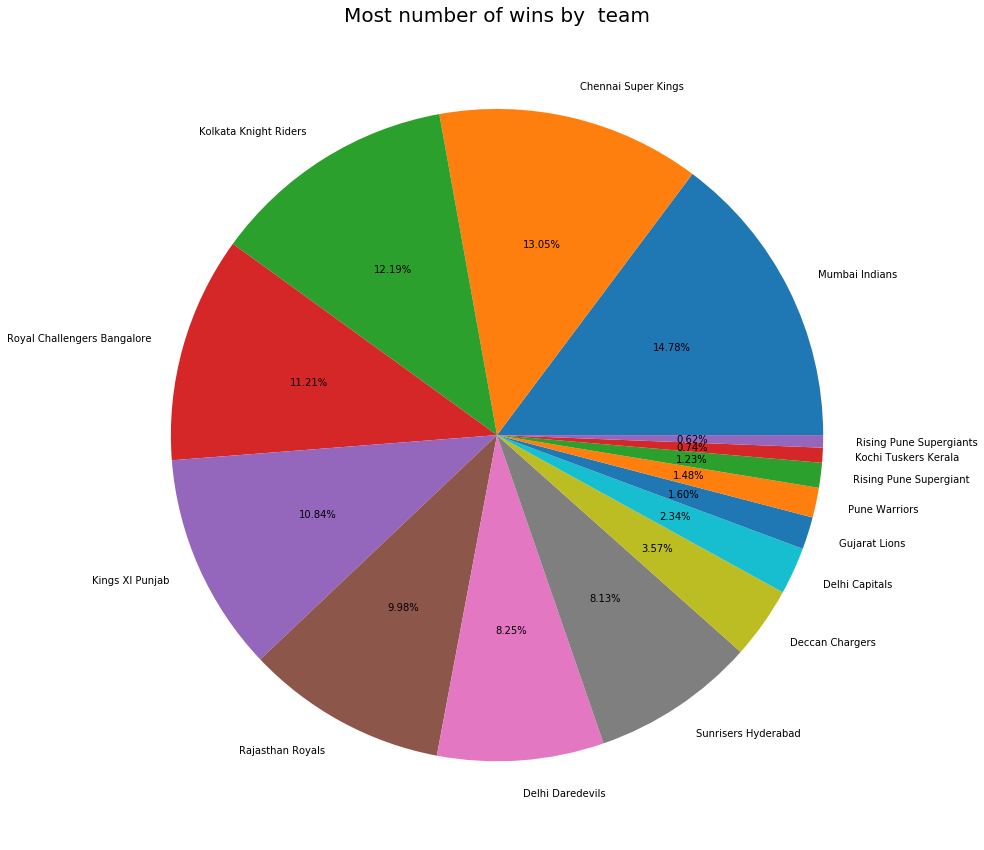

In [45]:
fig, ax = plt.subplots(figsize=(15,15))

ax = plt.pie(x=count_wins,autopct = "%.2f%%" ,labels=lables)
plt.title('Most number of wins by  team',fontsize=20)


## Most wins in eleminator Round

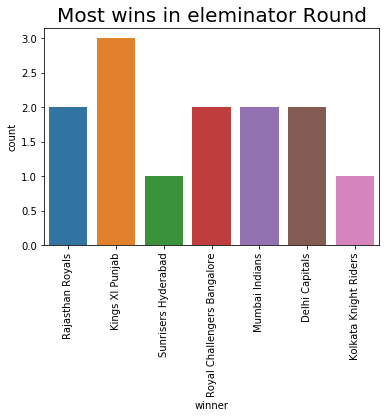

In [122]:
sns.countplot(df['winner'] [df['eliminator']=='Y'],data=df)
plt.title('Most wins in eleminator Round',fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [62]:
df['eliminator'].value_counts()

N    799
Y     13
Name: eliminator, dtype: int64

## Toss decision

In [64]:
teams= df['winner'].unique()
teams

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [65]:
toss_decision= pd.DataFrame([],columns=['Toss winner','Decision','No of times'])


In [66]:
toss_decision

,Toss winner,Decision,No of times


In [90]:

# adding values to toss_decision
teams= df['winner'].unique()
toss_decision= pd.DataFrame([],columns=['Toss winner','Decision','No of times'])

for id,element in enumerate(teams):
    opt_bat= df[(df['toss_winner'] == element) & (df['toss_decision'] == 'bat')]
    opt_field= df[(df['toss_winner'] == element) & (df['toss_decision'] == 'field')]
    
    toss_decision = toss_decision.append({'Toss winner' : element , 'Decision': 'bat', 
                                      'No of times' : opt_bat['toss_winner'].count() } , ignore_index=True)
    toss_decision = toss_decision.append({'Toss winner' : element , 'Decision': 'field', 
                                      'No of times' : opt_field['toss_winner'].count() }, ignore_index=True)

In [91]:
toss_decision

,Toss winner,Decision,No of times
0,Kolkata Knight Riders,bat,34
1,Kolkata Knight Riders,field,64
2,Chennai Super Kings,bat,51
3,Chennai Super Kings,field,46
4,Delhi Daredevils,bat,29
5,Delhi Daredevils,field,51
6,Royal Challengers Bangalore,bat,24
7,Royal Challengers Bangalore,field,63
8,Rajasthan Royals,bat,34
9,Rajasthan Royals,field,53


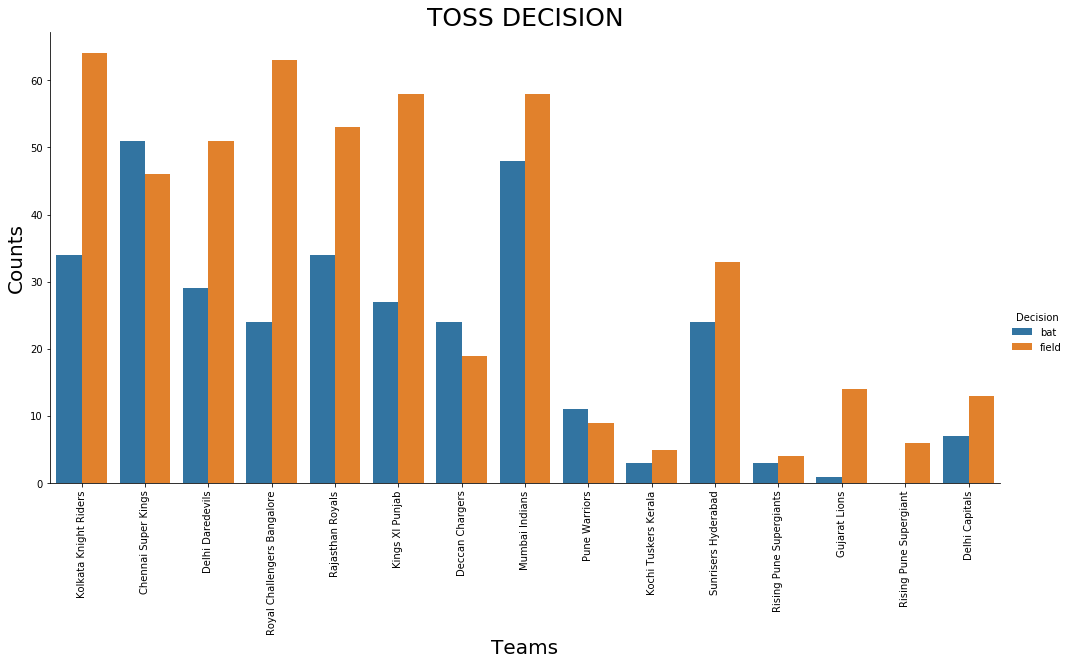

In [123]:
sns.catplot(x='Toss winner', y = 'No of times', hue= 'Decision' ,data = toss_decision, kind = 'bar', height =7, aspect = 2 )

plt.xticks(rotation = 90)
plt.title ('TOSS DECISION', fontsize=25)
plt.xlabel("Teams", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.show()

## Top 10 Venue, where max matches are  played

sns.barplot(df['venue'].value_counts()[0:11].values,
            df['venue'].value_counts()[0:11].index,
            data=df,color='red')

plt.title ('TOP 10 Venue', fontsize=25)
plt.xlabel("Count", fontsize=20)
plt.ylabel("Stadium", fontsize=20)

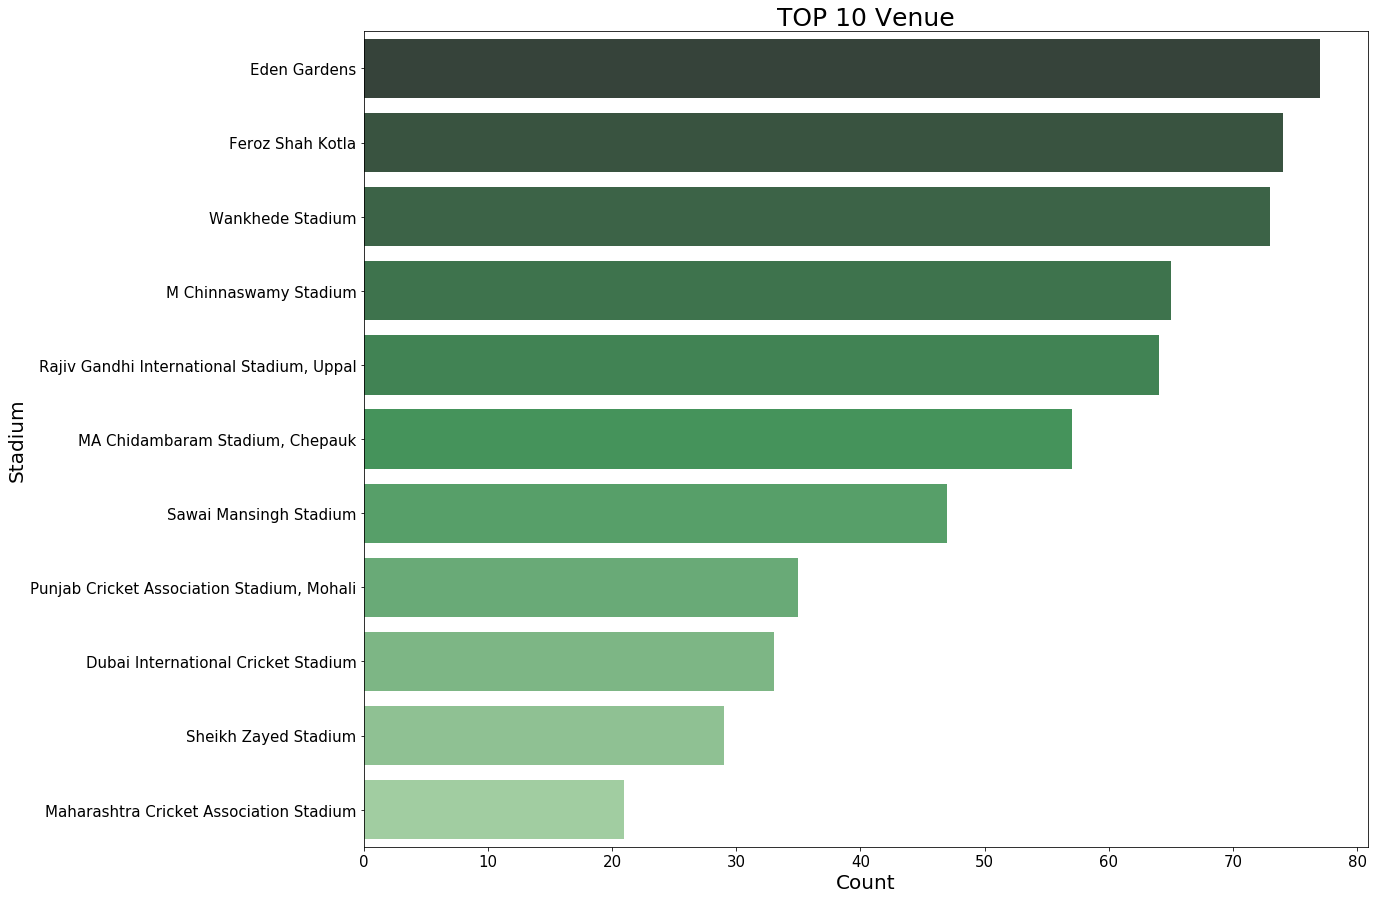

In [131]:
plt.figure(figsize=(18,15))
sns.barplot(df['venue'].value_counts()[0:11].values,
            df['venue'].value_counts()[0:11].index,
            data=df,color='green',palette='Greens_d')

plt.title ('TOP 10 Venue', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Count", fontsize=20)
plt.ylabel("Stadium", fontsize=20)
plt.show()